# Distance/Similarity and Recommender Systems  

<font color=green>__Distance:__ <font color = black> A measurement of how dissimilar or far apart two objects are.
    
Examples:
* Euclidean distance (range $[0, \infty)$):
$$ d(p_1, p_2) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$
    
Another common range for distances: $[0, 1]$

<font color=green>__Similarity:__ <font color = black> The complementary notion: measure how close/similar two points/objects are.
If we have a measure $D$ of distance with values in $[0, 1]$, then $1 - D$ could be a measure of similarity.

<font color=green>__Untargeted/Run of Network advertising:__ <font color = black> Run the same advertisement for everyone. If everyone sees the ad, then some subset of interested people will buy what you're selling.

<font color=green>__Targeted advertising:__ 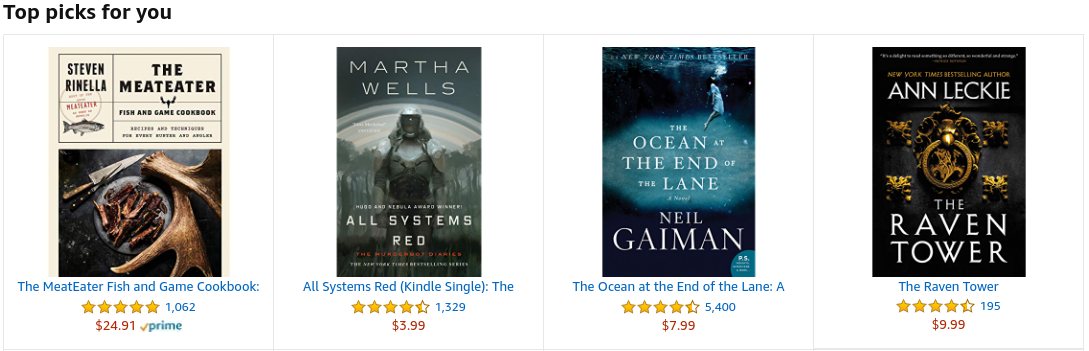

How do you think Amazon picks these recommendations?

<font color=green>__Collaborative filtering:__ <font color = black> "Filtering" because we're taking a large set of products ad drilling down to a small subset. "Collaborative" because all users of Amazon are contributing data to the process.

<font color=green>__User-based collaborative filtering__: <font color = black> Given a user $A$, find the most similar user $B$ and and recommend something that $B$ has bought that $A$ hasn't.

<font color=green>__Cold start problem:__ <font color = black> The problem of recommending products to a new user with no purchase history and therefore no data.

<font color=green>__Item-based collaborative filtering:__ <font color = black> Run your filter based on the similarity between items, not the similarity between users. To make a recommendation, choose an item from the user's purchase history and look up the most similar products, then recommend them. This is faster because we can simply store a database of the item similarities, and we don't need to recalculate the whole database of similarities when the user makes a new purchase. When we need a recommendation, we can just do a lookup in a table (and this is fast).

<font color=green>__Hw1:__ <font color = black>In HW1 we'll construct a very simple recommendation system based on conditional probability; today we'll sketch out how the algorithm works, and it's your job to fill in the gaps. <font color=red>***I suggest you take notes using pen and paper as we run through how the hw1 algorithm works.***

Idea: books $A$ and $B$ are similar if people who buy book $A$ are likely to also buy book $B$.

Mathematical tool: conditional probability. Express this idea in terms of
$$ P(\mbox{bought book $B$} | \mbox{bought book $A$}) = \frac{\mbox{# who bought both books}}{\mbox{# who bought $A$}}$$
    
If this probability is high, $A$ and $B$ are similar; if it is low, $A$ and $B$ are dissimilar.

<font color=green>__ISBN:__ <font color = black> Unique identifiers for books -- generally 10 or 13 digit numbers.

<font color=green>__More HW1:__ <font color=red>***In hw1, you will create a data matrix.***

<font color=green>__Sparse matrix:__  <font color = black> A matrix whose entries are mostly 0. Usually, worth it to store in a data structure that doesn't explicitly store all of the zeros. The data structure we'll use to solve this problem is a dictionary.

### Elements of the algorithm

In [1]:
import pandas as pd, pickle

In [3]:
with open('purchase_dict.pkl', 'rb') as fp:
    purchase_dict = pickle.load(fp)
purchase_dict

{'Dylan': [1231234123, 1231234126],
 'Aleah': [1231234123, 1231234125, 1231234126],
 'Ryan': [1231234123, 1231234124, 1231234126],
 'Sean': [1231234124, 1231234125],
 'Sarah': [1231234124, 1231234126]}

In [4]:
purchase_frame = pd.read_pickle('purchase_frame.pkl')

In [5]:
purchase_frame

,1231234123,1231234124,1231234125,1231234126
Dylan,1,0,0,1
Aleah,1,0,1,1
Ryan,1,1,0,1
Sean,0,1,1,0
Sarah,0,1,0,1


In [6]:
with open('purchase_dict.pkl', 'rb') as fp:
    purchase_dict = pickle.load(fp)
purchase_dict

{'Dylan': [1231234123, 1231234126],
 'Aleah': [1231234123, 1231234125, 1231234126],
 'Ryan': [1231234123, 1231234124, 1231234126],
 'Sean': [1231234124, 1231234125],
 'Sarah': [1231234124, 1231234126]}

In [ ]:
purchase_dict

In [7]:
freq_matrix = pd.read_pickle('frequency_matrix.pkl')

In [8]:
freq_matrix

,1231234123,1231234124,1231234125,1231234126
1231234123,3,1,1,3
1231234124,0,3,1,2
1231234125,0,0,2,1
1231234126,0,0,0,4


### SQL

In [ ]:
import sqlite3, os

In [ ]:
if os.path.exists('pets.db'):
    os.remove('pets.db')

In [ ]:
conn = sqlite3.connect('pets.db')

In [ ]:
conn.row_factory = sqlite3.Row
c = conn.cursor()
c.execute('CREATE TABLE dogs (name TEXT PRIMARY KEY, yob INTEGER, toy TEXT);')
c.execute('INSERT INTO dogs (name, yob, toy) VALUES (?, ?, ?);', ('Mildred', 2013, 'ball'))

In [ ]:
c.execute('INSERT INTO dogs (name, yob, toy) VALUES (?, ?, ?);', ('Rupert', 2015, 'plushie'))
conn.commit()

In [ ]:
c.execute('INSERT INTO dogs (name, yob, toy) VALUES (?, ?, ?);', ('Neville', 2014, 'rope'))
conn.commit()

In [ ]:
c.execute('SELECT * FROM dogs;')

In [ ]:
row = c.fetchone()

In [ ]:
row['name']

In [ ]:
c.execute('DELETE FROM dogs WHERE name = \'Mildred\';')

In [ ]:
for row in c.execute('SELECT * FROM dogs;').fetchall():
    print(list(row))

## <font  color=blue> Exercises: SQL review

The following is a SQL table named `students`.

| `name TEXT`      | `dob TEXT`   | `standing TEXT`  | `id INTEGER PRIMARY KEY`          |
|------------------|--------------|------------------|-----------------------------------|
|`Pollyanna, Anna` | `12/25/2001` | `Freshman`       | 131001                            |
|`Dandy, Jim`      | `07/11/1967` | `Sophomore`      | 131002                            |
|`Doe, Jane`       | `01/01/2000` | `Junior`         | 131003                            |
|`Public, John Q.` | `02/14/1998` | `Freshman`       | 131004                            |


Now create and populate the table from Python. Create a `sqlite3` connection object and connect to `students.db`. Then write and execute SQL statements that populate the table. 
Write a Python statement that changes Jim Dandy's class to 'Junior'.
Write a Python statement that deletes all records for all 'Junior's.

Python syntax you may need: `import sqlite3`, `sqlite3.connect(<db name>)`
returns a connection object, `conn.row_factory = sqlite3.Row` (don't really need
this, yet, but put it in for practice), `conn.cursor()` returns a cursor object,
`c.execute(<query string>)` executes a query if `c` is a cursor object, `con.commit()`,
`conn.close()`.

In [ ]:
if os.path.exists('students.db'):
    os.remove('students.db')

In [ ]:
conn = sqlite3.connect('students.db')

In [ ]:
conn.row_factory = sqlite3.Row

In [ ]:
c = conn.cursor()